In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\91951\\Desktop\\Greatlearning\\Unit 5 - Predictive Modeling\\Project")

In [4]:
df = pd.read_csv('cubic_zirconia.csv')

**Problem Statement:**

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Dataset for Problem 1: cubic_zirconia.csv

### Question - 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [5]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [6]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.shape

(26967, 11)

In [9]:
#Calculating basic statistical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
#Calculating basic statistical data including all information\
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


In [11]:
#Checking Null Value
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [12]:
#Checking duplicates in data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [13]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [14]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

### Performing univariate and bivariate analysis

Text(0.5, 1.0, 'x Distribution')

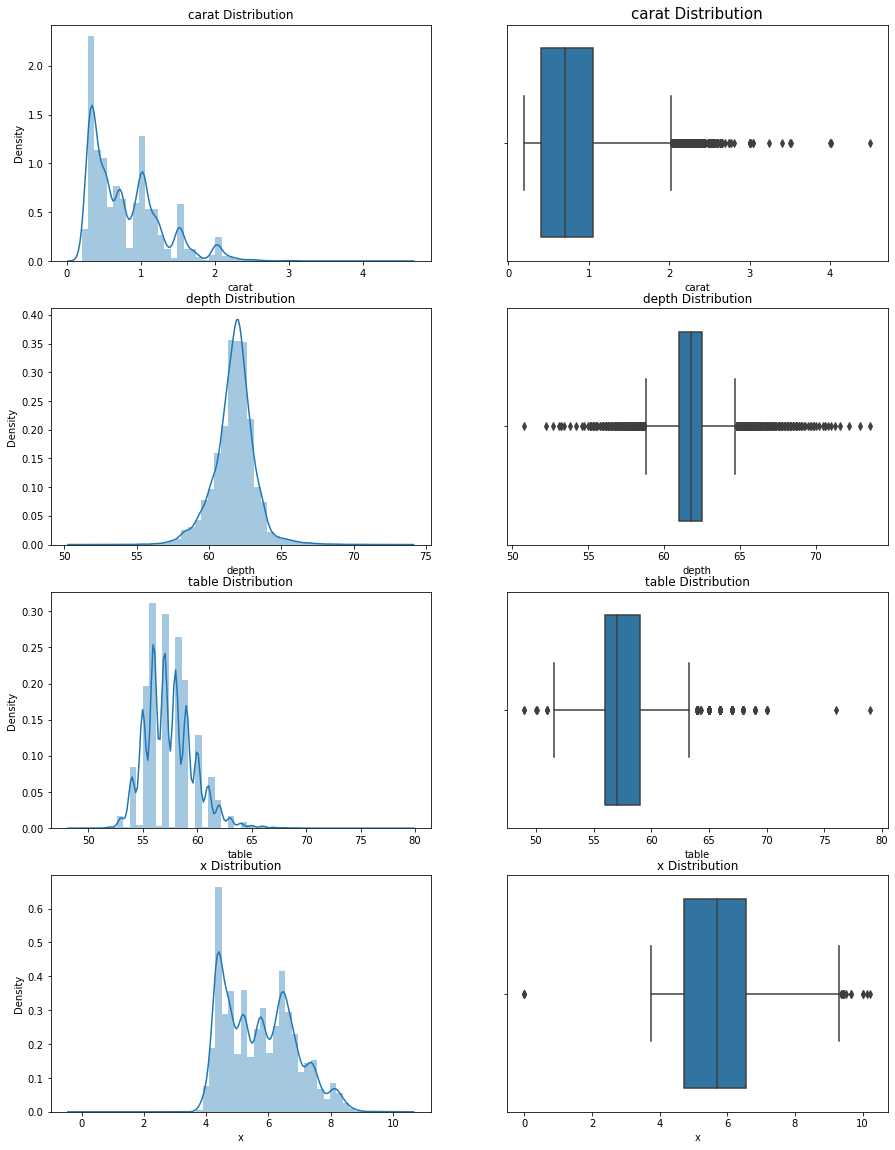

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=12)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=12)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=12)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=12)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=12)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=12)

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=12)

Text(0.5, 1.0, 'price Distribution')

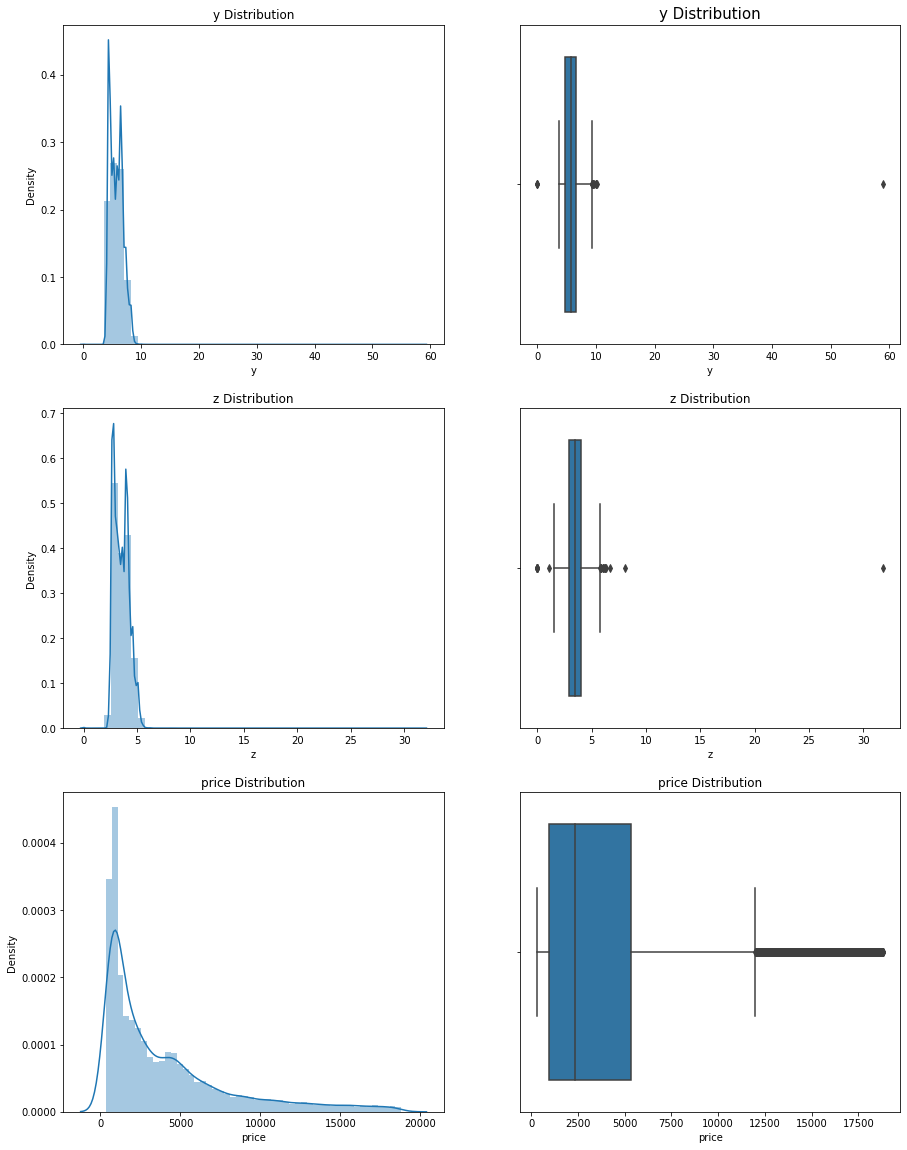

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=12)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=12)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=12)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=12)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=12)

In [17]:
#Measuring the skewness
df.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

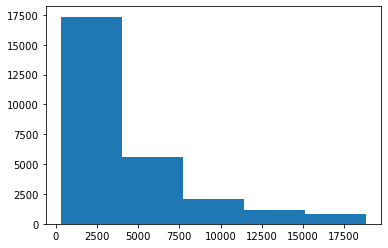

In [18]:
plt.hist(df.price, bins = 5)

plt.show()

### Graphs on categorical variables

In [19]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

<AxesSubplot:xlabel='cut', ylabel='count'>

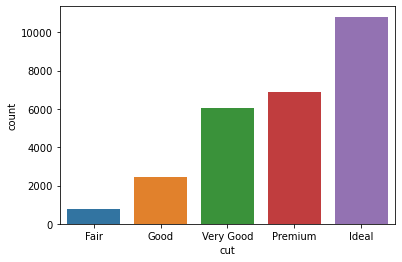

In [20]:
sns.countplot(df['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='cut', ylabel='price'>

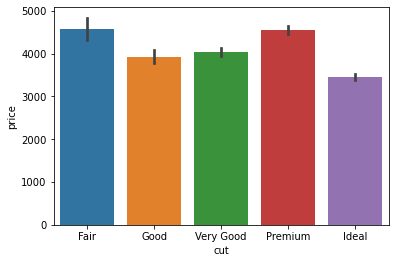

In [21]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<AxesSubplot:xlabel='color', ylabel='count'>

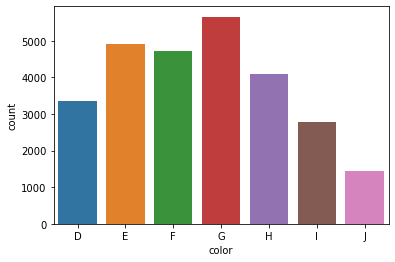

In [22]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

<AxesSubplot:xlabel='color', ylabel='price'>

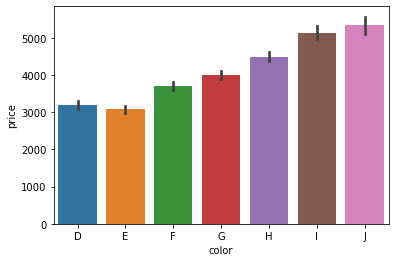

In [23]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

<AxesSubplot:xlabel='clarity', ylabel='count'>

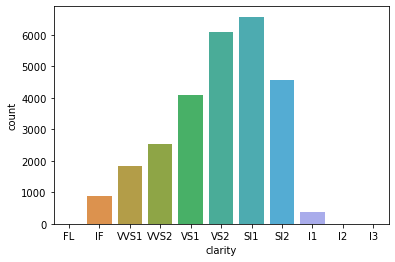

In [24]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

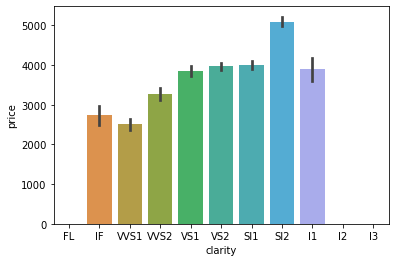

In [25]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:xlabel='cut'>

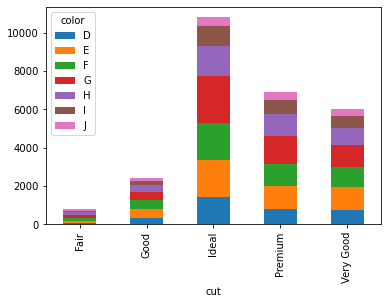

In [26]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='cut'>

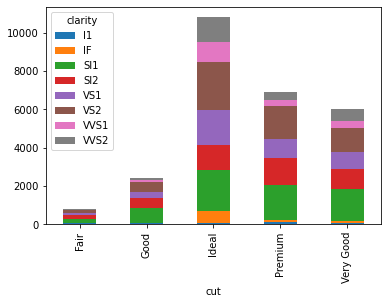

In [27]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

### Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

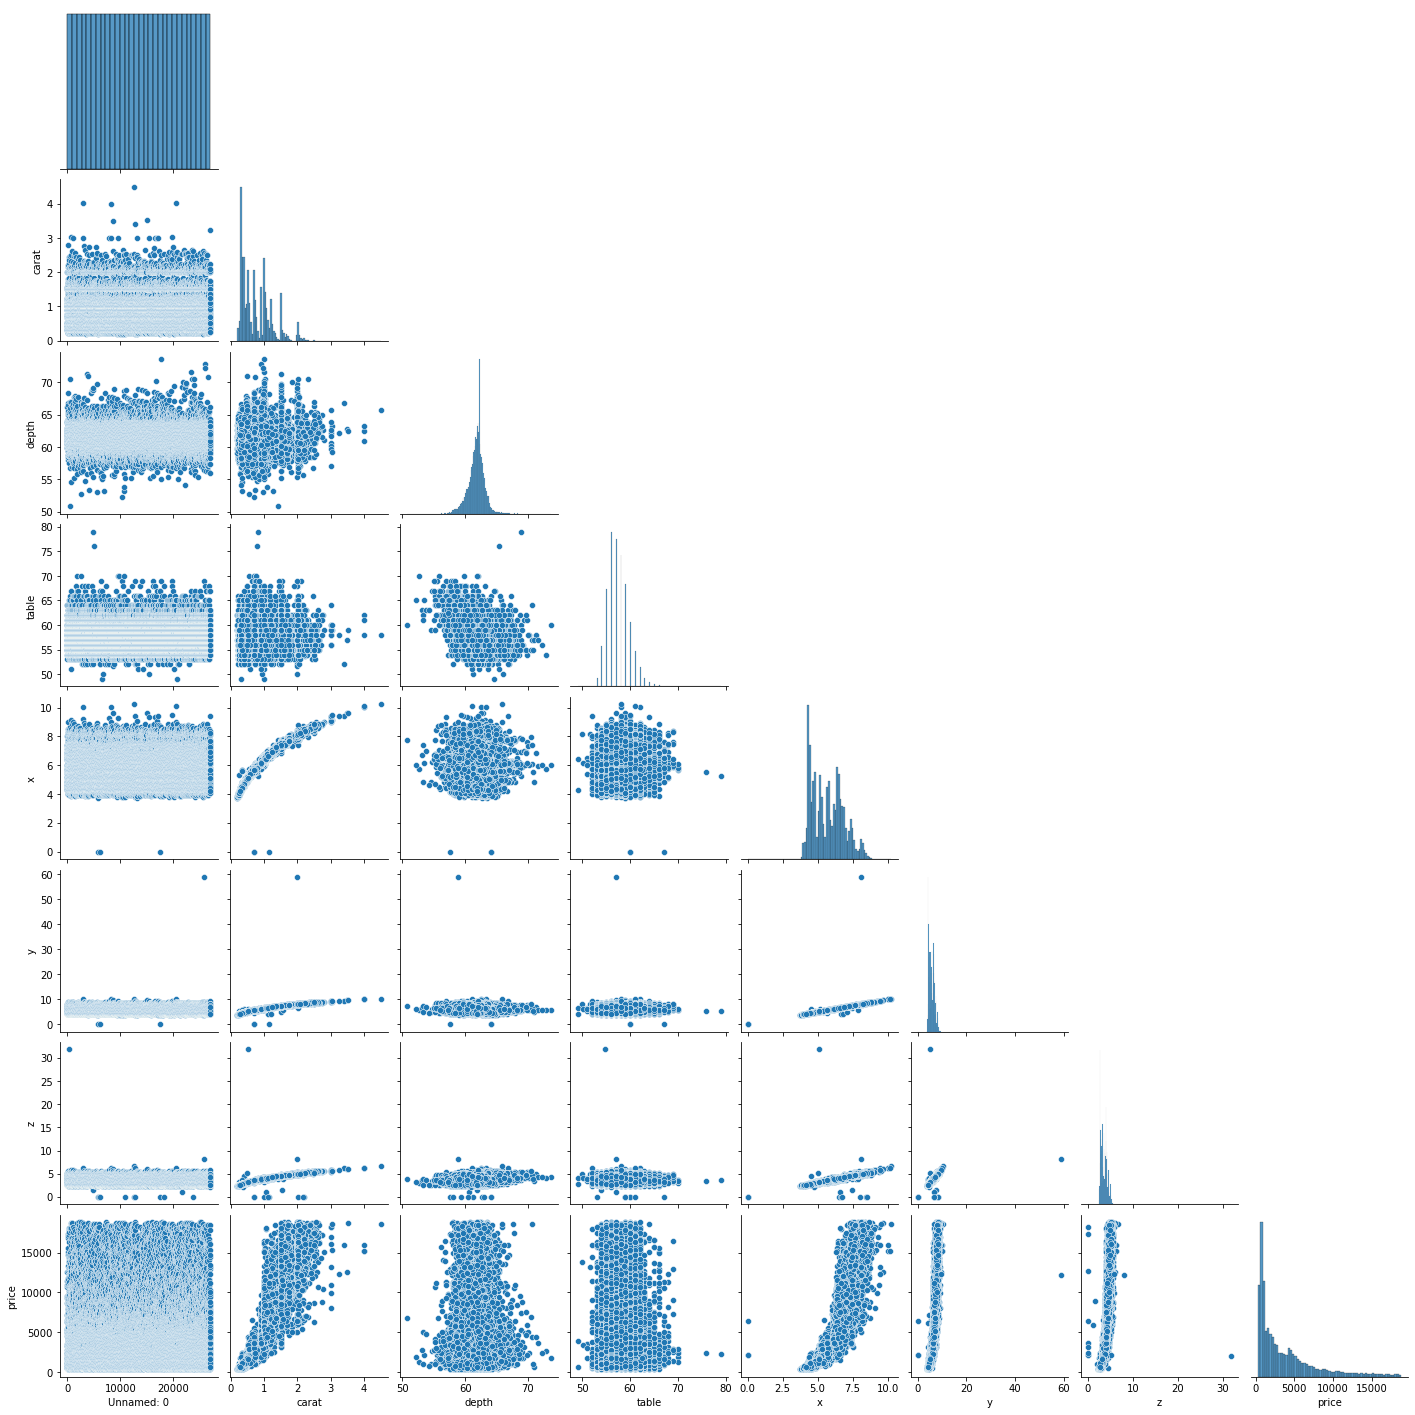

In [28]:
sns.pairplot(df,corner=True)
plt.show

### Checking for Correlations

In [29]:
df.corr().T

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003490,-0.001588,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001588,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.003817,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


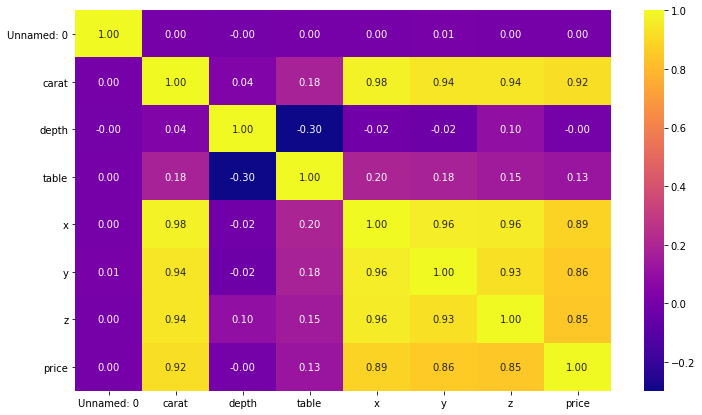

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt = '.2f',cmap='plasma')
plt.show()

### Question - 1.2.  Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [31]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [32]:
df[df.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
6215   x    0
       y    0
       z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

In [33]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [34]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [35]:
df[df.isin([0])].stack(0)

Series([], dtype: object)

In [36]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [37]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
#Getting numeric data
num_d = df.select_dtypes(exclude=['object'])

#Updating the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

In [40]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


**Finding Outliers**

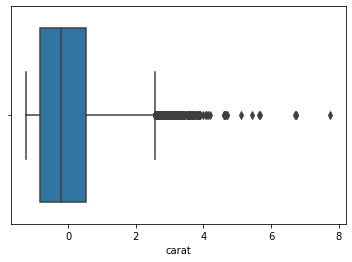

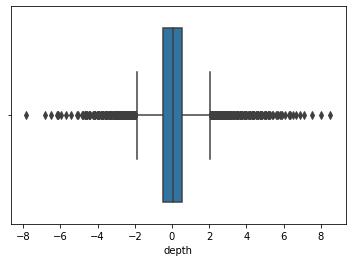

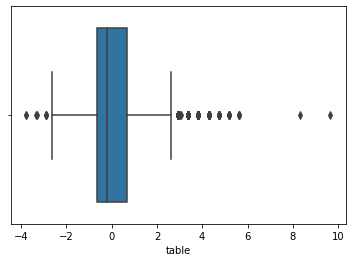

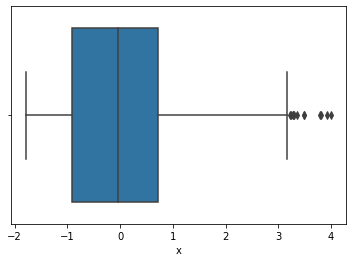

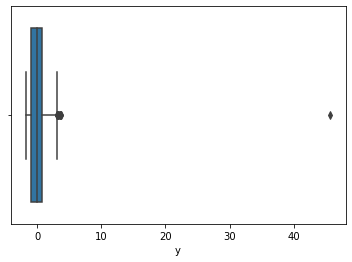

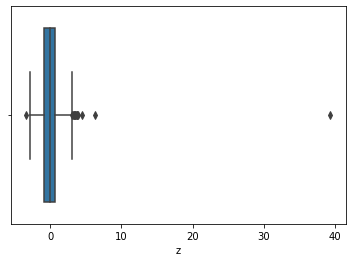

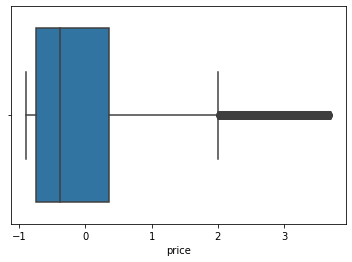

In [41]:
sns.boxplot(x='carat', data=df)
plt.show()
sns.boxplot(x='depth', data=df)
plt.show()
sns.boxplot(x='table', data=df)
plt.show()
sns.boxplot(x='x', data=df)
plt.show()
sns.boxplot(x='y', data=df)
plt.show()
sns.boxplot(x='z', data=df)
plt.show()
sns.boxplot(x='price', data=df)
plt.show()

Observations:

By looking at the graphs, we can see that the outliers are found only in the columns:

- carat
- depth
- table
- x
- y
- z
- price

**Outlier Treatment**

In [42]:
#capping technique
def remove_out(xyz):
    sorted(xyz)
    Q1,Q3 = xyz.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [43]:
lrcarat,urcarat = remove_out(df['carat'])
df['carat'] = np.where(df['carat'] > urcarat,urcarat,df['carat'])
df['carat'] = np.where(df['carat'] < lrcarat,lrcarat,df['carat'])

In [44]:
lrdepth,urdepth = remove_out(df['depth'])
df['depth'] = np.where(df['depth'] > urdepth,urdepth,df['depth'])
df['depth'] = np.where(df['depth'] < lrdepth,lrdepth,df['depth'])

In [45]:
lrtable,urtable = remove_out(df['table'])
df['table'] = np.where(df['table'] > urtable,urtable,df['table'])
df['table'] = np.where(df['table'] < lrtable,lrtable,df['table'])

In [46]:
lrx,urx = remove_out(df['x'])
df['x'] = np.where(df['x'] > urx,urx,df['x'])
df['x'] = np.where(df['x'] < lrx,lrx,df['x'])

In [47]:
lry,ury = remove_out(df['y'])
df['y'] = np.where(df['y'] > ury,ury,df['y'])
df['y'] = np.where(df['y'] < lry,lry,df['y'])

In [48]:
lrz,urz = remove_out(df['z'])
df['z'] = np.where(df['z'] > urz,urz,df['z'])
df['z'] = np.where(df['z'] < lrz,lrz,df['z'])

In [49]:
lrprice,urprice = remove_out(df['price'])
df['price'] = np.where(df['price'] > urprice,urprice,df['price'])
df['price'] = np.where(df['price'] < lrprice,lrprice,df['price'])

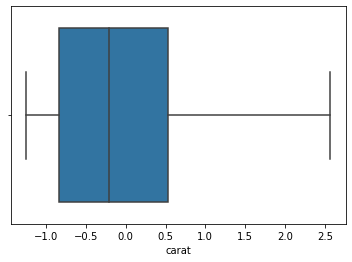

In [50]:
sns.boxplot(x='carat', data=df)
plt.show()

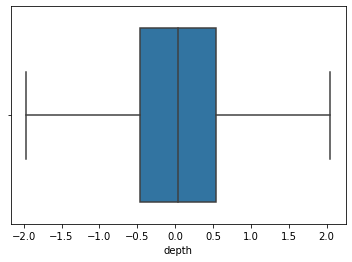

In [51]:
sns.boxplot(x='depth', data=df)
plt.show()

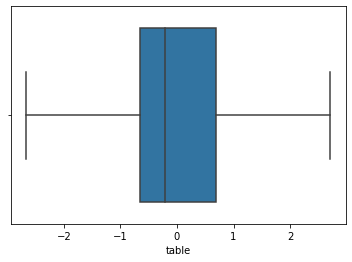

In [52]:
sns.boxplot(x='table', data=df)
plt.show()

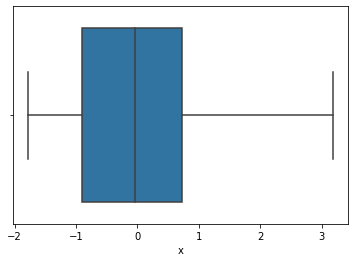

In [53]:
sns.boxplot(x='x', data=df)
plt.show()

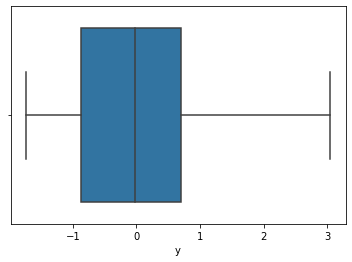

In [54]:
sns.boxplot(x='y', data=df)
plt.show()

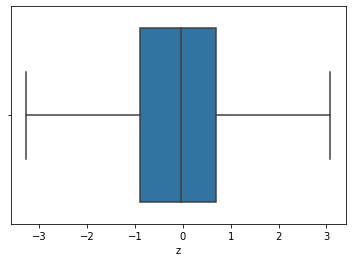

In [55]:
sns.boxplot(x='z', data=df)
plt.show()

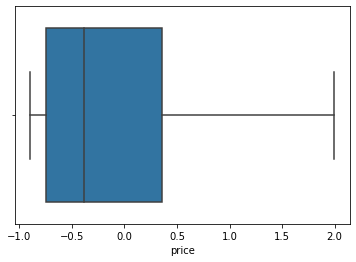

In [56]:
sns.boxplot(x='price', data=df)
plt.show()

<AxesSubplot:>

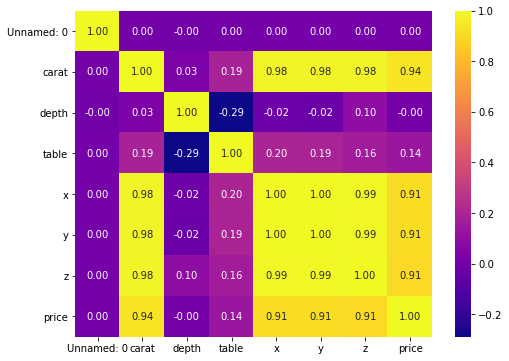

In [57]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='plasma')

### Question - 1.3. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.


**Step 1: Convert categorical to dummy variables in data**

In [58]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)
data.head(10)

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0
5,-1.731262,0.464433,-0.177012,-0.652273,0.647821,0.649450,0.627955,1.382872,0,1,...,0,0,0,0,0,0,0,1,0,0
6,-1.731133,0.443495,1.401161,1.140496,0.550190,0.486265,0.683679,0.223123,1,0,...,1,0,0,0,1,0,0,0,0,0
7,-1.731005,-0.624359,-0.177012,2.036880,-0.568127,-0.578734,-0.584040,-0.627177,0,0,...,0,0,0,0,1,0,0,0,0,0
8,-1.730877,0.862261,1.472896,2.709169,0.878584,0.769692,1.004092,0.365047,1,0,...,1,0,0,0,1,0,0,0,0,0
9,-1.730748,-0.938433,-0.894364,-0.204081,-1.074032,-0.973815,-1.085556,-0.803401,0,1,...,0,0,0,0,0,0,0,1,0,0


In [59]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

**Step 2: Data Split: Split the data into train and test (70:30)**

In [60]:
# dropping the id column
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [105]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [61]:
data_model.head(10)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0.464433,-0.177012,-0.652273,0.647821,0.649450,0.627955,1.382872,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0.443495,1.401161,1.140496,0.550190,0.486265,0.683679,0.223123,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7,-0.624359,-0.177012,2.036880,-0.568127,-0.578734,-0.584040,-0.627177,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0.862261,1.472896,2.709169,0.878584,0.769692,1.004092,0.365047,1,0,0,...,1,0,0,0,1,0,0,0,0,0
9,-0.938433,-0.894364,-0.204081,-1.074032,-0.973815,-1.085556,-0.803401,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
X = data_model.drop('price', axis=1)
y = data_model[['price']]

In [63]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
X.shape

(26958, 23)

In [65]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [66]:
y.shape

(26958, 1)

In [67]:
#Train and test split of X and y in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

**Step 3: Applying the Linear Regression Model**

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [69]:
# As further deep dive, explore coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804512
The coefficient for depth is 0.0056051434455706645
The coefficient for table is -0.013319500386804255
The coefficient for x is -0.3050434981963348
The coefficient for y is 0.30391448957926764
The coefficient for z is -0.13916571567988092
The coefficient for cut_Good is 0.09403402912977939
The coefficient for cut_Ideal is 0.1523107462056743
The coefficient for cut_Premium is 0.14852774839849367
The coefficient for cut_Very Good is 0.125838818784527
The coefficient for color_E is -0.04705442233369834
The coefficient for color_F is -0.06268437439142852
The coefficient for color_G is -0.10072161838356827
The coefficient for color_H is -0.207673133116617
The coefficient for color_I is -0.3239541927462753
The coefficient for color_J is -0.4685893027501587
The coefficient for clarity_IF is 0.9997691394634917
The coefficient for clarity_SI1 is 0.638978581827134
The coefficient for clarity_SI2 is 0.4295966234831559
The coefficient for clarity_VS1 

In [70]:
# Checking the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

The intercept for the model is -0.756762786304939


In [71]:
# R square for training data
regression_model.score(X_train, y_train)

0.9419557931252712

In [72]:
# R square for test data
regression_model.score(X_test, y_test)

0.9381643998102491

In [73]:
#RMSE for Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20690072466418796

In [74]:
#RMSE for Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21647817772382874

In [75]:
# Finding variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [77]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"-->",  vif[i])
        i = i+1

carat --> 33.35086119845924
depth --> 4.573918951598579
table --> 1.7728852812618994
x --> 463.5542785436457
y --> 462.769821646584
z --> 238.65819968687333
cut_Good --> 3.609618194943713
cut_Ideal --> 14.34812508118844
cut_Premium --> 8.623414379121153
cut_Very Good --> 7.848451571723688
color_E --> 2.371070464762613


In [78]:
#Finding the concatenation
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [79]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [99]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept      -0.662077
carat           1.102593
depth           0.004668
table          -0.016875
x              -0.373553
y               0.403978
z              -0.170463
cut_Good       -0.015859
cut_Ideal       0.035978
cut_Premium     0.038824
color_E        -0.046800
color_F        -0.063456
color_G        -0.100920
color_H        -0.207857
color_I        -0.324126
color_J        -0.469230
clarity_IF      1.017422
clarity_SI1     0.658350
clarity_SI2     0.447550
clarity_VS1     0.856709
clarity_VS2     0.785028
clarity_VVS1    0.961351
clarity_VVS2    0.950398
dtype: float64

In [100]:
#Getting Inferential statistical data
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.379e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:13:36   Log-Likelihood:                 2879.6
No. Observations:               18870   AIC:                            -5713.
Df Residuals:                   18847   BIC:                            -5533.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6621      0.014    -46.666   

Checking sum of squared errors
Method:
- Predicting value of y for test cases 
- Subtracting from the actual y for the test cases

In [83]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [84]:
import math

math.sqrt(mse)

0.21647817772382866

In [85]:
# Finding the model score i.e. coeff of determinant

regression_model.score(X_test, y_test)

0.9381643998102491

In [86]:
#mpg prediction
y_pred = regression_model.predict(X_test)

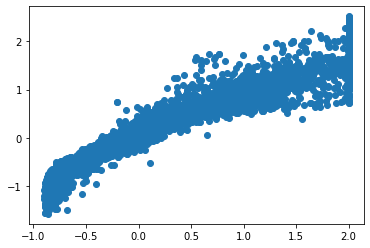

In [87]:
plt.scatter(y_test['price'], y_pred)

**Iteration: 2**

In [94]:
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept      -0.662192
carat           1.103434
table          -0.017374
x              -0.382216
y               0.386685
z              -0.145084
cut_Good       -0.014715
cut_Ideal       0.035280
cut_Premium     0.038083
color_E        -0.046850
color_F        -0.063490
color_G        -0.100866
color_H        -0.207769
color_I        -0.323904
color_J        -0.469094
clarity_IF      1.017614
clarity_SI1     0.658996
clarity_SI2     0.448011
clarity_VS1     0.857118
clarity_VS2     0.785536
clarity_VVS1    0.961571
clarity_VVS2    0.950799
dtype: float64

In [95]:
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.444e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:12:51   Log-Likelihood:                 2878.8
No. Observations:               18870   AIC:                            -5714.
Df Residuals:                   18848   BIC:                            -5541.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6622      0.014    -46.675   

In [96]:
#Concatenation of X and y into one DF
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [97]:
data_test.head(10)


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
26809,0.443495,0.109928,-0.204081,0.559065,0.580741,0.572231,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.122708
10087,0.024729,0.038193,-1.100465,0.212920,0.254370,0.237888,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.082442
22817,-0.812804,0.181664,-0.652273,-0.852144,-0.793452,-0.793005,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.689067
21676,0.045667,0.396869,-0.652273,0.204044,0.245781,0.265750,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.272740
14846,0.694754,0.683810,-0.204081,0.816456,0.812636,0.892644,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.642930
13877,-0.959372,-0.033542,-0.652273,-1.100658,-1.042524,-1.057694,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-0.830742
13596,-1.043125,0.038193,-1.100465,-1.242667,-1.188532,-1.197004,0,1,0,0,...,0,0,0,0,0,0,0,1,0,-0.746979
12904,-0.833742,-0.463953,-0.652273,-0.861019,-0.810629,-0.862660,0,1,0,0,...,0,0,1,0,0,0,0,0,0,-0.666448
4744,-0.352161,-1.970391,0.692304,-0.044470,-0.097767,-0.305421,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-0.520050
6879,-0.833742,0.827280,-0.652273,-0.923148,-0.870750,-0.806936,0,0,0,1,...,0,0,0,0,0,0,0,1,0,-0.741760


In [102]:
# Calculation of MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse


0.04314981841901313

In [103]:
#Root Mean Squared Error
np.sqrt(mse)

0.2077253437089782

In [104]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.66) * Intercept + (1.1) * carat + (-0.02) * table + (-0.38) * x + (0.39) * y + (-0.15) * z + (-0.01) * cut_Good + (0.04) * cut_Ideal + (0.04) * cut_Premium + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.02) * clarity_IF + (0.66) * clarity_SI1 + (0.45) * clarity_SI2 + (0.86) * clarity_VS1 + (0.79) * clarity_VS2 + (0.96) * clarity_VVS1 + (0.95) * clarity_VVS2 + 

### Question - 1.4. Inference: Basis on these predictions, what are the business insights and recommendations. 

**Overview:**

In this business case study, we're expected to help the Gem Stones co ltd to predict the price for the cubic zirconia and apprehension on the different price ranges. It should be noted that jewelry pricing is a vaguely understood process that typically results in very high retail prices, and then shockingly low resale prices. Below are the insights from the exploratory data analysis and linear regression model build from the dataset is given.

**Business insights:**
- While finding the unique categorical value during the exploratory data analysis it was observed that the ideal cut had given profit to the company.
- In terms of the colors, H, I, J turned out to be profit-generating.
- Similarly, the clarity levels VS1, VS2, SI1 were the most profitable among all. And  SI2 turned out to be the costliest in terms of price
- While comparing the cut and color, J was found as the most profitable and similarly WS2 during the comparison of cut and clarity.
- Coming to the built linear regression model, in the training set 94% discrepancy in the price has been explained

**Business Recommendations:**
- By talking in favor of revenue-generation from the product sales the focus will have to be customer preference, market preference, highest selling items, and factors pressing customer demand.
- In terms of Cut, the customer preference and sale goes with ideal, premium, and very good cuts. Hence, these highly selling products will be the prime focus in the marketing campaigns.
- The marketing ads can be broadcasted by focusing on the cut perfection, customer acceptance, quality, and pricing.
- Talking about the best 5 attributes that are most important: Cut, Carat, Y (Width of the stone), clarity VS1, VS2, SI1, and price.
